<a href="https://colab.research.google.com/github/Prashanth-000/Tensorflow/blob/main/deepLearningLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# program_1

from re import VERBOSE
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])

model=Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.1),
    metrics=['accuracy']
)

model.fit(x,y,epochs=1000,verbose=0)

loss,accuracy=model.evaluate(x,y)
print(f"Accuracy:{accuracy*100} %")

predictions=model.predict(x)
predictions=(predictions>0.5).astype(int)

for i, prediction in enumerate(predictions):
  print(f"input {x[i]} predicted {prediction[0]} : actual {y[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 1.0000 - loss: 9.9109e-05
Accuracy:100.0 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
input [0 0] predicted 0 : actual 0
input [0 1] predicted 1 : actual 1
input [1 0] predicted 1 : actual 1
input [1 1] predicted 0 : actual 0


In [ ]:
# program_2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.clip(x_train + 0.05 * np.random.normal(size=x_train.shape), 0, 1)

x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

train_gen = datagen.flow(x_train, y_train, batch_size=128, subset="training")
val_gen   = datagen.flow(x_train, y_train, batch_size=128, subset="validation")

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=[early])


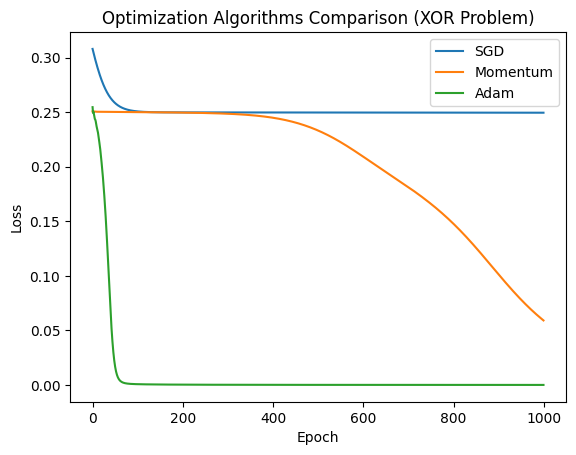

Final Loss (SGD): 0.24946710467338562
Final Loss (Momentum): 0.05912701040506363
Final Loss (Adam): 2.4044536985456944e-05


In [ ]:
# program_3
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

def create_model():
    model = keras.Sequential([
        layers.Dense(4, input_dim=2, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_model(optimizer_name, X, y, epochs=1000, lr=0.1):
    model = create_model()

    if optimizer_name == 'SGD':
        optimizer = optimizers.SGD(learning_rate=lr)
    elif optimizer_name == 'Momentum':
        optimizer = optimizers.SGD(learning_rate=lr, momentum=0.9)
    elif optimizer_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=lr)

    model.compile(optimizer=optimizer, loss=losses.MeanSquaredError())
    history = model.fit(X, y, epochs=epochs, verbose=0)

    return history.history['loss']

losses_sgd = train_model('SGD', X, y)
losses_momentum = train_model('Momentum', X, y)
losses_adam = train_model('Adam', X, y)

plt.plot(losses_sgd, label='SGD')
plt.plot(losses_momentum, label='Momentum')
plt.plot(losses_adam, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimization Algorithms Comparison (XOR Problem)')
plt.show()

print(f"Final Loss (SGD): {losses_sgd[-1]}")
print(f"Final Loss (Momentum): {losses_momentum[-1]}")
print(f"Final Loss (Adam): {losses_adam[-1]}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8573 - loss: 0.4491 - val_accuracy: 0.9837 - val_loss: 0.0572
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9821 - loss: 0.0579 - val_accuracy: 0.9822 - val_loss: 0.0603
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9869 - loss: 0.0421 - val_accuracy: 0.9888 - val_loss: 0.0398
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9915 - loss: 0.0270 - val_accuracy: 0.9905 - val_loss: 0.0337
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy: 0.9897 - val_loss: 0.0351
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9908 - loss: 0.0312

Test Accuracy: 0.9919


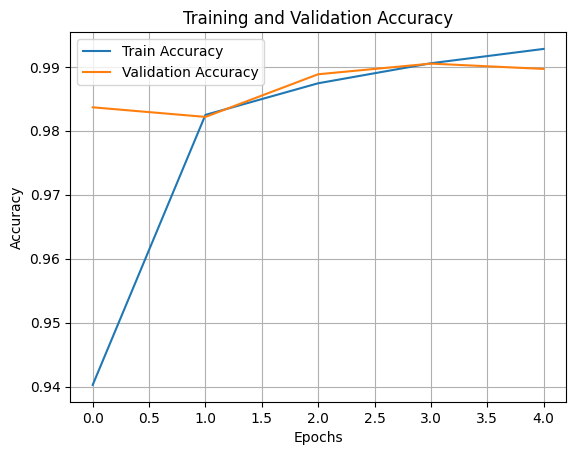

In [2]:
# program_4
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype("float32") / 255
x_test  = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype("float32") / 255

y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 163ms/step - accuracy: 0.5228 - loss: 0.6884 - val_accuracy: 0.7116 - val_loss: 0.5861
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.7005 - loss: 0.5939
Accuracy is 69.92800235748291 %


/tmp/ipython-input-929217687.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


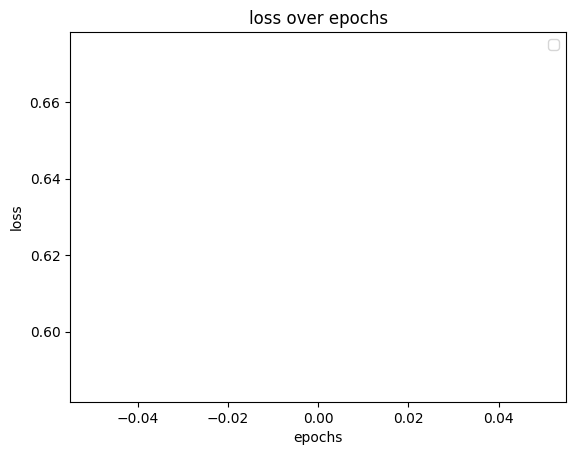

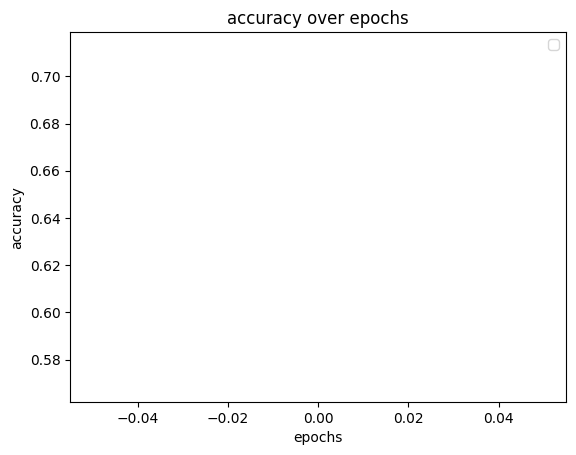

In [3]:
# program_5

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout ,Dense
import matplotlib.pyplot as plt

vocab_size=10000
sequence_len=200

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=vocab_size)
x_train=pad_sequences(x_train,maxlen=sequence_len ,padding='post')
x_test=pad_sequences(x_test,maxlen=sequence_len,padding='post')

model=Sequential([
    layers.Embedding(input_dim=vocab_size,output_dim=64,input_length=sequence_len),
    layers.LSTM(units=64,return_sequences=False),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')

])
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)
model.summary()

history=model.fit(
    x_train,
    y_train,
    epochs=1,
    batch_size=64,
    validation_split=0.2
)

loss,accuracy=model.evaluate(x_test,y_test)
print(f"Accuracy is {accuracy*100} %")

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend()
  plt.title(f"{string} over epochs")
  plt.show()

plot_graph(history,"loss")
plot_graph(history,"accuracy")

In [9]:
# program_6

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np

seq_length = 10
num_samples = 1000

X = []
y = []
for _ in range(num_samples):
    start = np.random.randint(0, 100)
    seq = np.arange(start, start + seq_length)
    X.append(seq[:-1])
    y.append(seq[1:])

X = np.array(X, dtype=np.float32)[..., np.newaxis]
y = np.array(y, dtype=np.float32)[..., np.newaxis]

def build_simple_rnn(input_size=1, hidden_size=32, output_size=1):
    model = tf.keras.Sequential([
        layers.SimpleRNN(hidden_size, return_sequences=True, input_shape=(seq_length - 1, input_size)),
        layers.Dense(output_size)
    ])
    model.compile(optimizer=Adam(0.01), loss='mse')
    return model

def build_birnn(input_size=1, hidden_size=32, output_size=1):
    model = tf.keras.Sequential([
        layers.Bidirectional(
            layers.SimpleRNN(hidden_size, return_sequences=True),
            input_shape=(seq_length - 1, input_size)
        ),
        layers.Dense(output_size)
    ])
    model.compile(optimizer=Adam(0.01), loss='mse')
    return model

def train_model(model, X, y, epochs=50):
    history = model.fit(X, y, epochs=epochs, verbose=0)
    return history.history['loss'][-1]

rnn_model = build_simple_rnn()
birnn_model = build_birnn()

rnn_loss = train_model(rnn_model, X, y)
birnn_loss = train_model(birnn_model, X, y)

print(f"Final Loss (Simple RNN): {rnn_loss:.4f}")
print(f"Final Loss (BiRNN):      {birnn_loss:.4f}")


Final Loss (Simple RNN): 0.9156
Final Loss (BiRNN):      0.1713


In [10]:
# program_7

import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

num_samples = 1000
timesteps = 5
input_dim = 1
latent_dim = 32

X = np.random.rand(num_samples, timesteps, input_dim)
Y = np.flip(X, axis=1)

encoder_inputs = Input(shape=(timesteps, input_dim))
encoder_outputs, state_h, state_c = LSTM(latent_dim, return_state=True)(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(timesteps, input_dim))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(input_dim)
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='mse')

model.fit([X, Y], Y, epochs=10, batch_size=32)

pred = model.predict([X[:1], Y[:1]])

print("Input:\n", X[0].squeeze())
print("Predicted reversed:\n", pred[0].squeeze())
print("True reversed:\n", Y[0].squeeze())


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3144
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0778
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0667
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0624
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0581
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0558
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0484
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0311
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Input:
 [0.25137927 0.02234336 0.97365121 0.46417372 0.86355077]
Predicted reversed:
 [0.74918514 0.44530955 0.69750583 0.10939368 0.2764248 ]
True reversed:
 [0.86355077 0.46417372 0.97365121 0.02234336 0.25137927]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5, Reconstruction Loss: 0.1195
Epoch 2/5, Reconstruction Loss: 0.0840
Epoch 3/5, Reconstruction Loss: 0.0744
Epoch 4/5, Reconstruction Loss: 0.0693
Epoch 5/5, Reconstruction Loss: 0.0658


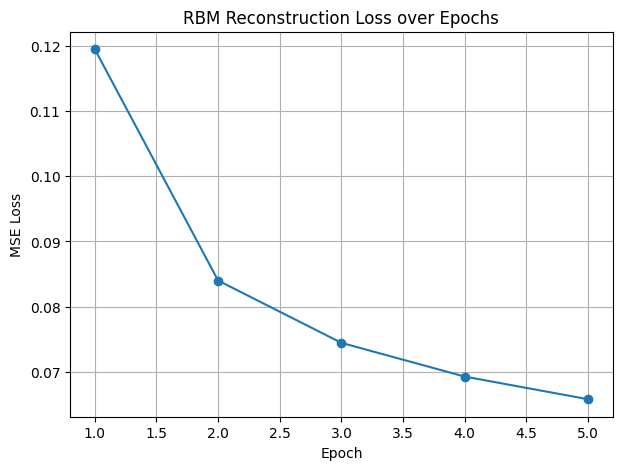

In [11]:
# program_8

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = (x_train > 0.5).astype('float32')
x_train = x_train.reshape(-1, 784)

batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(10000).batch(batch_size)

class RBM(tf.keras.Model):
    def __init__(self, n_visible, n_hidden):
        super(RBM, self).__init__()
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        initializer = tf.initializers.RandomNormal(mean=0.0, stddev=0.01)
        self.W = tf.Variable(initializer([n_visible, n_hidden]), name='weights')
        self.h_bias = tf.Variable(tf.zeros([n_hidden]), name='hidden_bias')
        self.v_bias = tf.Variable(tf.zeros([n_visible]), name='visible_bias')

    def sample_prob(self, probs):
        return tf.nn.relu(tf.sign(probs - tf.random.uniform(tf.shape(probs))))

    def sample_h(self, v):
        prob_h = tf.nn.sigmoid(tf.matmul(v, self.W) + self.h_bias)
        return prob_h, self.sample_prob(prob_h)

    def sample_v(self, h):
        prob_v = tf.nn.sigmoid(tf.matmul(h, tf.transpose(self.W)) + self.v_bias)
        return prob_v, self.sample_prob(prob_v)

    def contrastive_divergence(self, v, lr=0.01):
        prob_h, h0 = self.sample_h(v)
        prob_v, v1 = self.sample_v(h0)
        prob_h1, _ = self.sample_h(v1)
        positive_grad = tf.matmul(tf.transpose(v), prob_h)
        negative_grad = tf.matmul(tf.transpose(v1), prob_h1)
        batch_size = tf.cast(tf.shape(v)[0], tf.float32)
        self.W.assign_add(lr * (positive_grad - negative_grad) / batch_size)
        self.v_bias.assign_add(lr * tf.reduce_mean(v - v1, axis=0))
        self.h_bias.assign_add(lr * tf.reduce_mean(prob_h - prob_h1, axis=0))
        loss = tf.reduce_mean(tf.square(v - v1))
        return loss

n_visible = 784
n_hidden = 128
rbm = RBM(n_visible, n_hidden)

n_epochs = 5
lr = 0.05
losses = []

for epoch in range(n_epochs):
    epoch_loss = 0
    for batch in train_dataset:
        loss = rbm.contrastive_divergence(batch, lr)
        epoch_loss += loss.numpy()
    avg_loss = epoch_loss / len(list(train_dataset))
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{n_epochs}, Reconstruction Loss: {avg_loss:.4f}")

plt.figure(figsize=(7, 5))
plt.plot(range(1, n_epochs+1), losses, marker='o')
plt.title("RBM Reconstruction Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


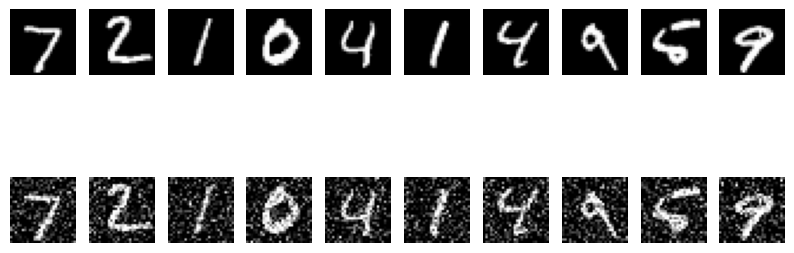

235/235 ━━━━━━━━━━━━━━━━━━━━ 188s 791ms/step - loss: 0.2991 - val_loss: 0.0981
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


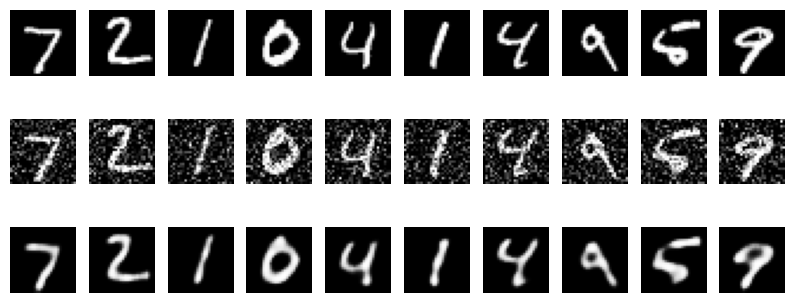

In [13]:
# program_9
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

x_train_noisy = np.clip(x_train + 0.3 * np.random.normal(0, 1, x_train.shape), 0, 1)
x_test_noisy = np.clip(x_test + 0.3 * np.random.normal(0, 1, x_test.shape), 0, 1)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray'); plt.axis('off')
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray'); plt.axis('off')
plt.show()

autoencoder = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')
])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=1, batch_size=256, validation_data=(x_test_noisy, x_test))

decoded = autoencoder.predict(x_test_noisy)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(3, 10, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray'); plt.axis('off')
    plt.subplot(3, 10, i+11)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray'); plt.axis('off')
    plt.subplot(3, 10, i+21)
    plt.imshow(decoded[i].squeeze(), cmap='gray'); plt.axis('off')
plt.show()


Step 0 | D loss: 0.706 | G loss: 0.694


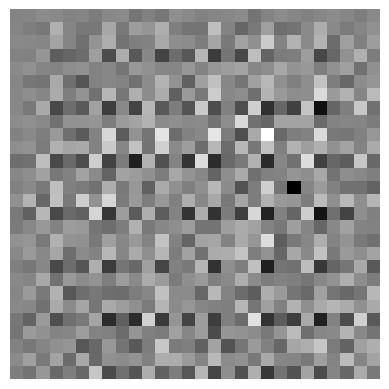

In [18]:
# program_10
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), _ = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype("float32") - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

batch_size = 128
buffer_size = 60000
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(buffer_size).batch(batch_size)

def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(7*7*128, input_dim=100),
        layers.LeakyReLU(0.2),
        layers.Reshape((7,7,128)),
        layers.Conv2DTranspose(64, (5,5), strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Conv2DTranspose(1, (5,5), strides=2, padding="same", activation="tanh")
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5,5), strides=2, padding="same", input_shape=[28,28,1]),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),
        layers.Conv2D(128, (5,5), strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
discriminator.trainable = False

gan_input = tf.keras.Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer="adam")

epochs = 10

for step in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake = generator.predict(noise, verbose=0)
    real = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
    X = np.concatenate([real, fake])
    y = np.concatenate([np.ones((batch_size,1)), np.zeros((batch_size,1))])
    d_loss, _ = discriminator.train_on_batch(X, y)

    noise = np.random.normal(0, 1, (batch_size, 100))
    y_gen = np.ones((batch_size,1))
    g_loss = gan.train_on_batch(noise, y_gen)

    if step % 500 == 0:
        print(f"Step {step} | D loss: {d_loss:.3f} | G loss: {g_loss:.3f}")
        z = np.random.normal(0,1,(1,100))
        gen_img = generator.predict(z, verbose=0)[0,:,:,0]
        plt.imshow(gen_img * 0.5 + 0.5, cmap="gray")
        plt.axis("off")

plt.show()
